# Fuselage design 

Steps from Sadraey
1. Identify and list the fuselage design requirements.
2. Select fuselage layout (internal): side view, front view, and top view.
3. Establish the fuselage optimum length-to-diameter ratio (Lf/Df)opt.
4. length-to-diameter ratio.
5. Design the cargo/luggage compartment.
6. Determine the required volume for other components (e.g., fuel, landing gear).
7. Check if the available fuselage space for other components is sufficient.
8. Calculate the fuselage maximum diameter (Df).
9. Select the number of access panels for maintenance.
10. Design the fuselage nose section.
11. Design the fuselage rear section.
12. Determine the upsweep angle (αus).
13. Calculate the fuselage overall length (Lf).
24. Apply lofting.
15. Check if the fuselage design satisfies the design requirements.
16. If any design requirement is not met, return to the relevant design step and recalculate the corresponding parameter.
17. Optimize.
18. Draw the final design with dimensions.

**Step 1: Aircraft type, mission, and design requirements.**
 - Type: commercial UAV
 - Payload: Cargo (avionics, batteries, etc.)
 - Range (km): 200 km
 - Cruise ceiling (m ASL): 4000 m
 - Design requirements: ask Integration


**Step 2: Fuselage internal layout**
Fuselage configuration: standard cylindrical fuselage with cone shaped nose and rear (single fuselage, single deck)

<ins>The following items must be accommodated by the fuselage:</ins>\
– Cabin for systems and payload.\
– Measurement and control systems\
– Mechanical, electrical systems.\
– Landing gear.

<ins>Basic observation and constraints:</ins>
1. the fuselage is preferred to be symmetric from a top view.	
2. the fuselage must be as small and compact as possible.
3. the usable loads (battery) must be close to the aircraft center of gravity.
4. a standard circular cross-section was selected for the cockpit and cabin during the conceptual design.
5. the arrangement must be such that the aircraft center of gravity is close to the wing/fuselage aerodynamic center.	

Side and top view of internal arrangement (to update)

**Step 3: Fuselage length to diameter ratio**

<h3 style='text-align: center;'> D<sub>f</sub> = W<sub>C</sub> + 2T<sub>W</sub> </h3>
<h3 style='text-align: center;'> L<sub>f</sub> = L<sub>C</sub> + L<sub>CP</sub> + L<sub>N</sub> + L<sub>R</sub> </h3>
<h3 style='text-align: center;'> L/D = L<sub>f</sub> / D<sub>f</sub> </h3>

Where:\
D<sub>f</sub> = fuselage diameter (m)\
T<sub>W</sub> = fuselage wall thickness (m)\
L<sub>f</sub>= fuselage length\
L<sub>C</sub> = cabin length\
L<sub>CP</sub> = cockpit length (m) =1.5D\
L<sub>N</sub> = nose length (m)\
L<sub>R</sub> = rear length (m)\
L/D = length-to-diameter ratio 


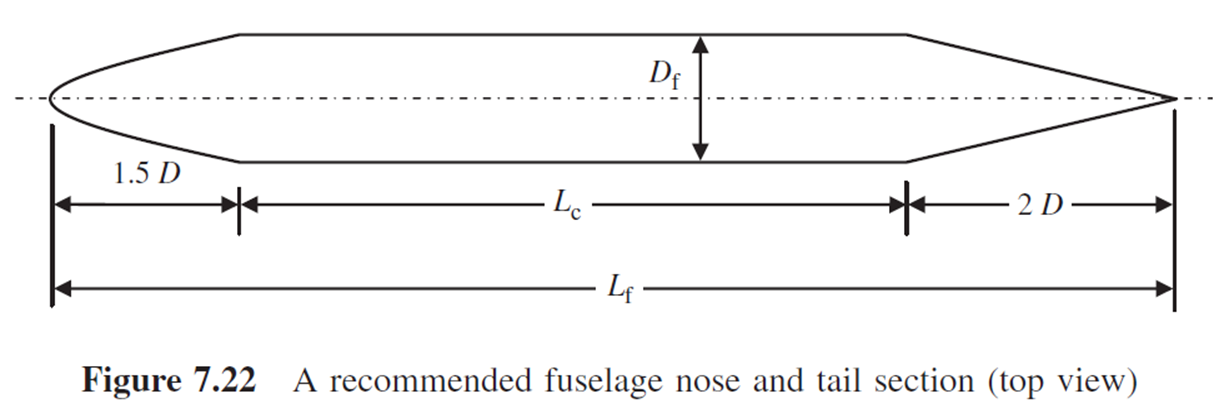

**Step 4: Check if the available fuselage space for other components is sufficient**

<h2 style='text-align: center;'> 

